In [76]:
import pathlib

benchmark_tree = pathlib.Path() / '..' / 'benchmark' / 'aig' / 'mcnc' / '5xp1.json'
benchmark_entropy = pathlib.Path() / '..' / 'benchmark' / 'entropy' / 'mcnc' / '5xp1.json'

In [77]:
import landauer.entropy as entropy
import landauer.parse as parse

with open(benchmark_tree) as f:
    aig = parse.deserialize(f.read())

with open(benchmark_entropy) as f:
    entropy_data = entropy.deserialize(f.read())

In [78]:
import landauer.summary as summary
import landauer.algorithms.greedy as greedy

samples = list()
for forwarding in greedy.greedy(aig, entropy_data):
    details = summary.summary(forwarding, entropy_data)
    samples.append((details['entropy_losses'], details['depth']))

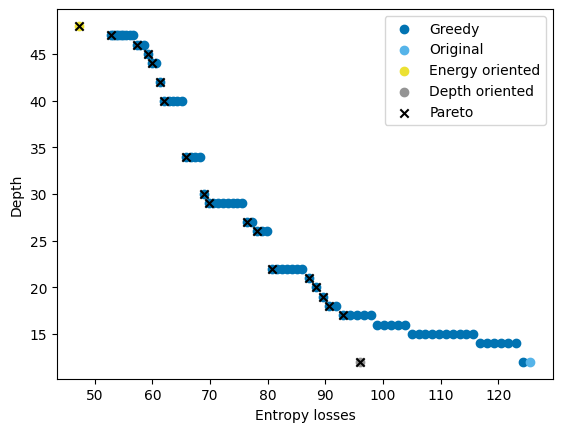

In [79]:
import landauer.plot as plot
p = plot.Plot()
p.plot_samples(samples, 'Greedy')
p.plot_original(aig, entropy_data)
p.plot_naive(aig, entropy_data)
p.plot_pareto()